In [228]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [229]:
# 데이터 로딩
df = sns.load_dataset('titanic')

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [231]:
# sex, pclass, age에 따른 생존율
# 먼저 sex, pclass, age에 해당하는 고유값을 뽑자. 
df['age'].unique(), df['sex'].unique(), df['pclass'].unique(), df['survived'].unique()

(array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
         4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
         8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
        49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
        16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
        71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
        51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
        45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
        60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
        70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ]),
 array(['male', 'female'], dtype=object),
 array([3, 1, 2], dtype=int64),
 array([0, 1], dtype=int64))

In [232]:
df['pclass'].unique().sort()

In [233]:
# df[df['sex'] == 'male'].describe()   #.describe().loc['mean', 'survived']
# df[(df['sex'] == 'male') & df['survived']== 1].describe()['count', 'survived']

female: 314명 중에 233명 생존하였습니다.
sex컬럼의 female생존율 : 74.20382165605096%
male: 577명 중에 109명 생존하였습니다.
sex컬럼의 male생존율 : 18.890814558058924%


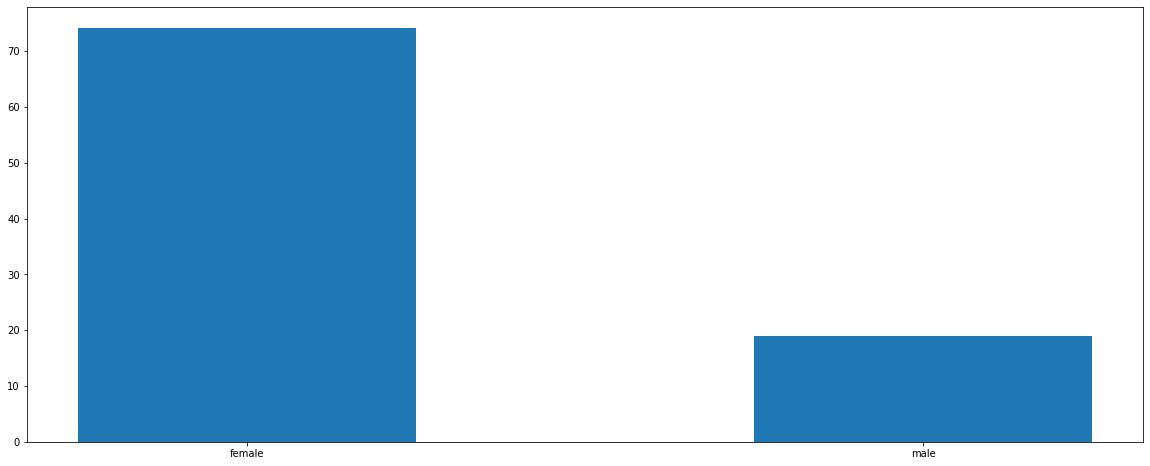

1: 216명 중에 136명 생존하였습니다.
pclass컬럼의 1생존율 : 62.96296296296296%
2: 184명 중에 87명 생존하였습니다.
pclass컬럼의 2생존율 : 47.28260869565217%
3: 491명 중에 119명 생존하였습니다.
pclass컬럼의 3생존율 : 24.236252545824847%


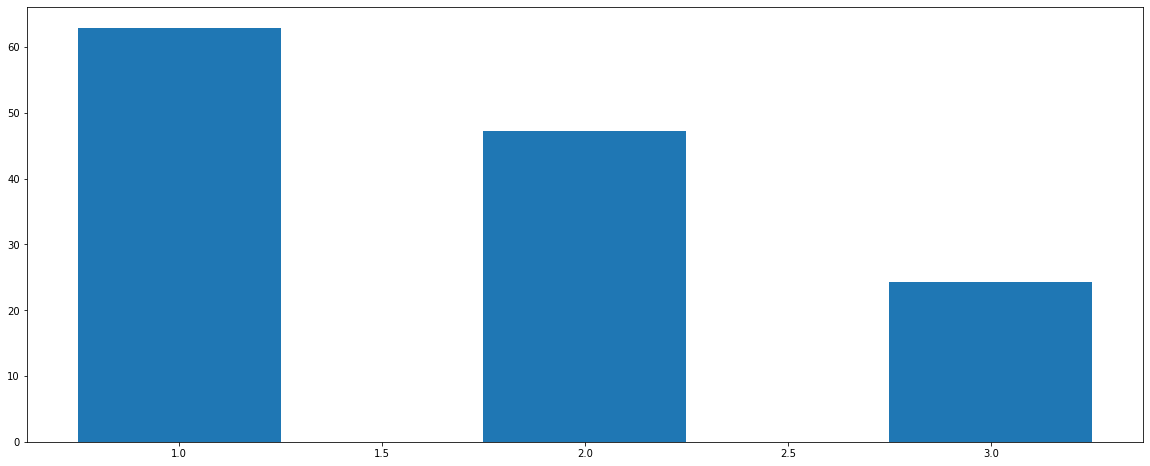

In [234]:
def survive(col, df):
    temp = 0; value_list = []
    label = df[col].unique()
    label.sort()
    cond = df['survived'] == 1
    totalDf = df.groupby([col]).count()
    survDf = df[cond].groupby([col]).count()
    meanDf = 100 * survDf / totalDf

    for value in label:
        total = totalDf.loc[value, 'survived']  
        surv = survDf.loc[value, 'survived']
        mean = meanDf.loc[value, 'survived']
        print(f'{value}: {total}명 중에 {surv}명 생존하였습니다.') 
        print(f'{col}컬럼의 {value}생존율 : {mean}%')
    # 그래프 그리기
    width = 0.5
    plt.rcParams['figure.figsize'] = (20,8)
    value_list = meanDf['survived']
    plt.bar(label, value_list, width)
    plt.show()

# 함수 구현   
survive('sex', df)
survive('pclass', df)   




In [235]:
# 'age'컬럼은 구간을 나눠야한다.
labels = ['0~9', '10~19', '20~29', '30~39', '40~49', '50~59', '60~69', '70~79', '80~89'] 
df.insert(df.columns.get_loc('age') + 1, 'age_cat', 0)
df['age_cat'] = pd.cut(df['age'], bins= [0, 10,20,30,40,50,60,70,80, 90],right=False, labels=labels )

In [236]:
df[df['age_cat']== '70~79']
totalDf = df.groupby(['age_cat']).count()
survDf = df[df['survived']== 1].groupby(['age_cat']).count()
meanDf = 100 * survDf / totalDf
meanDf
meanDf.loc['70~79', 'survived']

0.0

0~9: 62명 중에 38명 생존하였습니다.
age_cat컬럼의 0~9생존율 : 61.29032258064516%
10~19: 102명 중에 41명 생존하였습니다.
age_cat컬럼의 10~19생존율 : 40.19607843137255%
20~29: 220명 중에 77명 생존하였습니다.
age_cat컬럼의 20~29생존율 : 35.0%
30~39: 167명 중에 73명 생존하였습니다.
age_cat컬럼의 30~39생존율 : 43.712574850299404%
40~49: 89명 중에 34명 생존하였습니다.
age_cat컬럼의 40~49생존율 : 38.20224719101124%
50~59: 48명 중에 20명 생존하였습니다.
age_cat컬럼의 50~59생존율 : 41.666666666666664%
60~69: 19명 중에 6명 생존하였습니다.
age_cat컬럼의 60~69생존율 : 31.57894736842105%
80~89: 1명 중에 1명 생존하였습니다.
age_cat컬럼의 80~89생존율 : 100.0%
nan: 177명 중에 52명 생존하였습니다.
age_cat컬럼의 nan생존율 : 29.37853107344633%


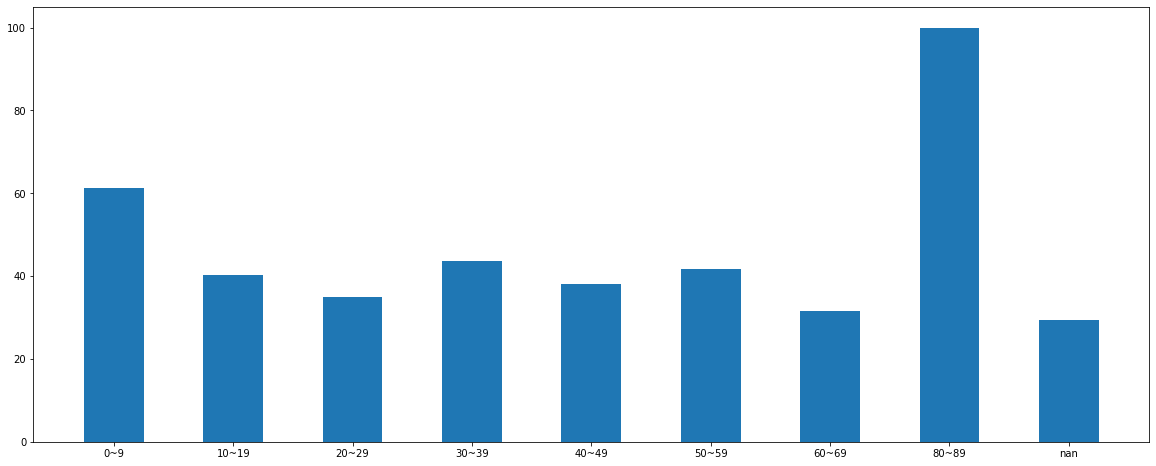

In [237]:

df['age_cat'] = df['age_cat'].astype(str)

# 70~79세 인원이 없길래 제거
df2 = df[df['age_cat'] != '70~79']
survive('age_cat', df2)

In [238]:
df.head(10)

,survived,pclass,sex,age,age_cat,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,20~29,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,30~39,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,20~29,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,30~39,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,30~39,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,nan,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,50~59,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,0~9,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,20~29,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,10~19,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [239]:
# cond = df['survived'] == 1
# a = df.groupby(['age_cat', 'sex']).count()
# b = df[cond].groupby(['age_cat']).count()

# b/a

adult_male       age     alive     alone     class      deck  \
age_cat sex                                                                    
0~9     female    1.266667  1.266667  1.266667  1.266667  1.266667  2.000000   
        male      1.187500  1.187500  1.187500  1.187500  1.187500  1.333333   
10~19   female    0.911111  0.911111  0.911111  0.911111  0.911111  1.153846   
        male      0.719298  0.719298  0.719298  0.719298  0.719298  2.500000   
20~29   female    1.069444  1.069444  1.069444  1.069444  1.069444  1.285714   
        male      0.520270  0.520270  0.520270  0.520270  0.520270  1.800000   
30~39   female    1.216667  1.216667  1.216667  1.216667  1.216667  1.461538   
        male      0.682243  0.682243  0.682243  0.682243  0.682243  1.583333   
40~49   female    1.062500  1.062500  1.062500  1.062500  1.062500  1.727273   
        male      0.596491  0.596491  0.596491  0.596491  0.596491  0.904762   
50~59   female    1.111111  1.111111  1.111111  1.111111  1.111111  1.083333   
        male      0.666667  0.666667  0.666667  0.666667  0.666667  1.083333   
60~69   female    1.500000  1.500000  1.500000  1.500000  1.500000  1.333333   
        male      0.400000  0.400000  0.400000  0.400000  0.400000  0.571429   
70~79   male           NaN       NaN       NaN       NaN       NaN       NaN   
80~89   male      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
nan     female    0.981132       NaN  0.981132  0.981132  0.981132  1.571429   
        male      0.419355       NaN  0.419355  0.419355  0.419355  0.916667   

                embark_town  embarked      fare     parch    pclass  sex  \
age_cat sex                                                                
0~9     female     1.266667  1.266667  1.266667  1.266667  1.266667  NaN   
        male       1.187500  1.187500  1.187500  1.187500  1.187500  NaN   
10~19   female     0.911111  0.911111  0.911111  0.911111  0.911111  NaN   
        male       0.719298  0.719298  0.719298  0.719298  0.719298  NaN   
20~29   female     1.069444  1.069444  1.069444  1.069444  1.069444  NaN   
        male       0.520270  0.520270  0.520270  0.520270  0.520270  NaN   
30~39   female     1.220339  1.220339  1.216667  1.216667  1.216667  NaN   
        male       0.672897  0.672897  0.682243  0.682243  0.682243  NaN   
40~49   female     1.062500  1.062500  1.062500  1.062500  1.062500  NaN   
        male       0.596491  0.596491  0.596491  0.596491  0.596491  NaN   
50~59   female     1.111111  1.111111  1.111111  1.111111  1.111111  NaN   
        male       0.666667  0.666667  0.666667  0.666667  0.666667  NaN   
60~69   female     1.666667  1.666667  1.500000  1.500000  1.500000  NaN   
        male       0.333333  0.333333  0.400000  0.400000  0.400000  NaN   
70~79   male            NaN       NaN       NaN       NaN       NaN  NaN   
80~89   male       1.000000  1.000000  1.000000  1.000000  1.000000  NaN   
nan     female     0.981132  0.981132  0.981132  0.981132  0.981132  NaN   
        male       0.419355  0.419355  0.419355  0.419355  0.419355  NaN   

                   sibsp  survived       who  
age_cat sex                                   
0~9     female  1.266667  1.266667  1.266667  
        male    1.187500  1.187500  1.187500  
10~19   female  0.911111  0.911111  0.911111  
        male    0.719298  0.719298  0.719298  
20~29   female  1.069444  1.069444  1.069444  
        male    0.520270  0.520270  0.520270  
30~39   female  1.216667  1.216667  1.216667  
        male    0.682243  0.682243  0.682243  
40~49   female  1.062500  1.062500  1.062500  
        male    0.596491  0.596491  0.596491  
50~59   female  1.111111  1.111111  1.111111  
        male    0.666667  0.666667  0.666667  
60~69   female  1.500000  1.500000  1.500000  
        male    0.400000  0.400000  0.400000  
70~79   male         NaN       NaN       NaN  
80~89   male    1.000000  1.000000  1.000000  
nan     female  0.981132  0.981132  0.981132  
 